<a href="https://colab.research.google.com/github/19K41A05F3/NNDL/blob/main/NNDL_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import keras 
from keras.preprocessing.image import ImageDataGenerator, img_to_array,load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
train_datagen = ImageDataGenerator(shear_range = 0.3, zoom_range = 0.5, horizontal_flip = True,preprocessing_function=preprocess_input)
valid_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/RiceDiseaseDataset/train', # relative path from working directoy
                                                 target_size = (128, 128),
                                                 batch_size = 32)

Found 2400 images belonging to 4 classes.


In [ ]:
valid_set = valid_datagen.flow_from_directory('/content/drive/MyDrive/RiceDiseaseDataset/validation', # relative path from working directoy
                                             target_size = (128, 128), 
                                        batch_size = 6)

Found 492 images belonging to 4 classes.


In [ ]:
t_img,label=training_set.next()


In [ ]:
t_img

array([[[[135.061   , 124.221   , 117.32    ],
         [135.061   , 124.221   , 117.32    ],
         [135.061   , 124.221   , 117.32    ],
         ...,
         [137.061   , 129.22101 , 125.32    ],
         [137.061   , 129.22101 , 125.32    ],
         [137.061   , 129.22101 , 125.32    ]],

        [[135.061   , 124.221   , 117.32    ],
         [135.061   , 124.221   , 117.32    ],
         [135.061   , 124.221   , 117.32    ],
         ...,
         [137.061   , 129.22101 , 125.32    ],
         [137.061   , 129.22101 , 125.32    ],
         [137.061   , 129.22101 , 125.32    ]],

        [[135.061   , 124.221   , 117.32    ],
         [135.061   , 124.221   , 117.32    ],
         [135.061   , 124.221   , 117.32    ],
         ...,
         [137.061   , 129.22101 , 125.32    ],
         [137.061   , 129.22101 , 125.32    ],
         [137.061   , 129.22101 , 125.32    ]],

        ...,

        [[104.061   ,  96.221   ,  92.32    ],
         [104.061   ,  96.221   ,  92.32    ]

In [ ]:
def plotImage(img_arr, label):
  for im ,l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/255)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


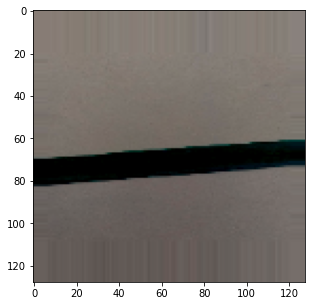

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


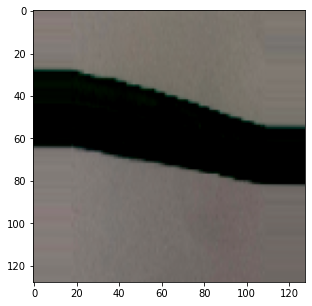

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


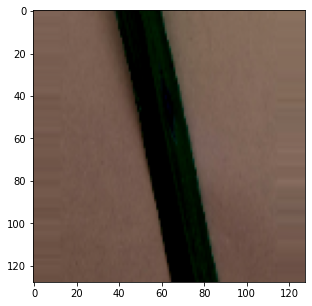

In [ ]:
plotImage(t_img[:3],label[:3])

BUILDING MODEL

In [ ]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras


In [ ]:
base_model=VGG19(input_shape=(128,128,3),include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
 layer.trainable=False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
X=Flatten()(base_model.output)

X=Dense(units=4,activation='softmax')(X)
model=Model(base_model.input,X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)
mc=ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1,save_best_only=True)
cb=[es,mc]

In [ ]:
his=model.fit_generator(training_set,
                        steps_per_epoch=10,
                        epochs=4,
                        verbose=1,
                        callbacks=cb,
                        validation_data=valid_set,
                        validation_steps=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/4
10/10 [==============================] - ETA: 0s - loss: 4.4480 - accuracy: 0.4594
Epoch 1: val_accuracy did not improve from 0.50000
10/10 [==============================] - 49s 5s/step - loss: 4.4480 - accuracy: 0.4594 - val_loss: 3.4902 - val_accuracy: 0.4062
Epoch 2/4
10/10 [==============================] - ETA: 0s - loss: 3.6434 - accuracy: 0.4812
Epoch 2: val_accuracy did not improve from 0.50000
10/10 [==============================] - 49s 5s/step - loss: 3.6434 - accuracy: 0.4812 - val_loss: 4.4718 - val_accuracy: 0.3750
Epoch 3/4
10/10 [==============================] - ETA: 0s - loss: 4.0016 - accuracy: 0.5031
Epoch 3: val_accuracy did not improve from 0.50000
10/10 [==============================] - 48s 5s/step - loss: 4.0016 - accuracy: 0.5031 - val_loss: 3.5766 - val_accuracy: 0.4688
Epoch 4/4
10/10 [==============================] - ETA: 0s - loss: 3.8869 - accuracy: 0.5156
Epoch 4: val_accuracy did not improve from 0.50000
10/10 [==============================

In [ ]:
h=his.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show>

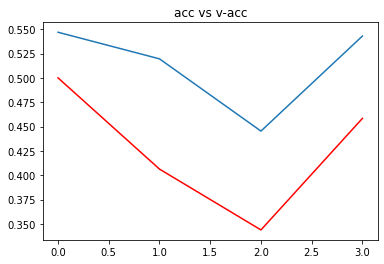

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs v-acc")
plt.show

<function matplotlib.pyplot.show>

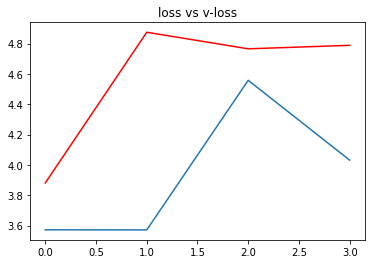

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs v-loss")
plt.show

In [ ]:
from keras.models import load_model
model=load_model("/content/best_model.h5")

In [ ]:
acc = model.evaluate_generator(valid_set)[1]
print(f"acc {acc*100}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


acc 42.276424169540405
